In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sin_wave(amp, freq, time):
    return amp * np.sin(2*np.pi*freq*time)

In [3]:
time = np.arange(0, 10, 0.001) # 10초 
sin1 = sin_wave(1, 10, time)
sin2 = sin_wave(2, 5, time)
sin3 = sin_wave(4, 1, time)
sin4 = sin_wave(4, 2, time)
sin5 = sin_wave(2, 2, time)
sin6 = sin_wave(1, 2, time)

In [4]:
sample_rate = 1/(time[1]-time[0])
sample_rate

1000.0

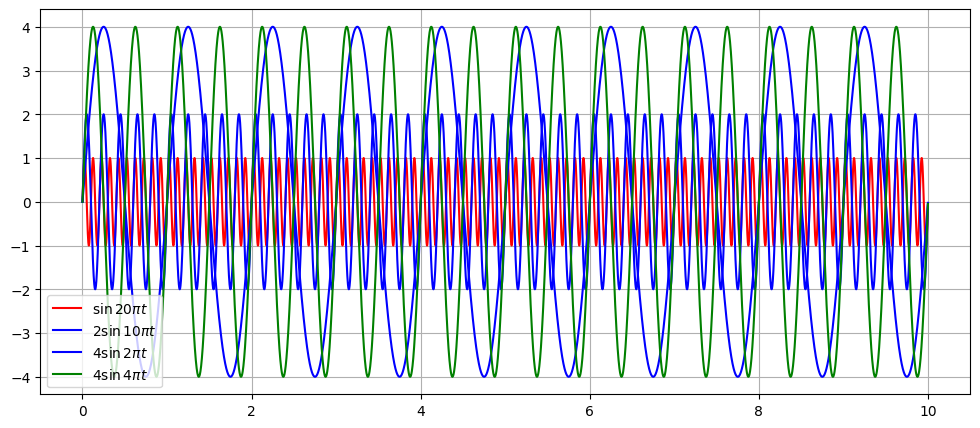

In [5]:
plt.figure(figsize=(12,5))
plt.plot(time, sin1, label=r"$\sin {20\pi} t$", color='red')
plt.plot(time, sin2, label=r"$2\sin {10\pi} t$", color='blue')
plt.plot(time, sin3, label=r"$4\sin {2\pi} t$", color='blue')
plt.plot(time, sin4, label=r"$4\sin {4\pi} t$", color='green')
plt.legend(); plt.grid(); plt.show()

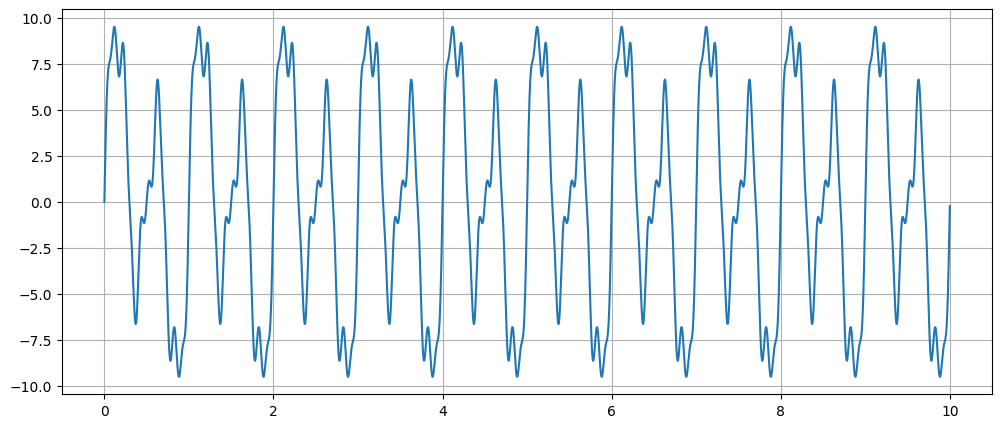

In [6]:
sin_sum = sin1 + sin2 + sin3 + sin4 + sin5 + sin6

plt.figure(figsize=(12,5))
plt.plot(time, sin_sum)
plt.grid()
plt.show()

In [7]:
n = len(sin_sum) 
k = np.arange(n)
Fs = 1/0.001
T = n/Fs
freq = k/T 
freq = freq[range(int(n/2))]

In [8]:
Y = np.fft.fft(sin_sum)/n 
Y = Y[range(int(n/2))]
Y

array([ 7.34366035e-18+0.00000000e+00j,  1.63037772e-18+4.21958320e-17j,
       -3.53889304e-17+1.28341782e-16j, ...,
       -2.29854953e-17+2.53351798e-17j, -3.97587872e-17+9.93462324e-18j,
        2.36380701e-17+1.72834653e-17j])

In [9]:
freq[abs(Y) > 0.01]

array([ 1.,  2.,  5., 10.])

* 같은 frequency가 있다면 거기에 겹쳐서 들어간다
* time이 겹쳐 올라감

&rightarrow; frequency 10에 0.5

&rightarrow; frequency 5에 1

&rightarrow; frequency 2에 4,2,1이 있어서 3.5

&rightarrow; frequency 1에 4 있어서 2

---
* sin_wave = "$asin2\pi * frequency * time$"
* sin1 = sin_wave(1, 10, time) = "$1 \cdot \sin(2 \cdot 10\pi \cdot t)$"
* sin2 = sin_wave(2, 5, time) = "$2 \cdot \sin(2 \cdot 5\pi \cdot t)$"
* sin3 = sin_wave(4, 1, time) = "$4 \cdot \sin(2 \cdot 1\pi \cdot t)$"
* sin4 = sin_wave(4, 2, time) = "$4 \cdot \sin(2 \cdot 2\pi \cdot t)$"
* sin5 = sin_wave(2, 2, time) = "$2 \cdot \sin(2 \cdot 2\pi \cdot t)$"
* sin6 = sin_wave(1, 2, time) = "$1 \cdot \sin(2 \cdot 2\pi \cdot t)$"


In [12]:
Y

array([ 7.34366035e-18+0.00000000e+00j,  1.63037772e-18+4.21958320e-17j,
       -3.53889304e-17+1.28341782e-16j, ...,
       -2.29854953e-17+2.53351798e-17j, -3.97587872e-17+9.93462324e-18j,
        2.36380701e-17+1.72834653e-17j])

: 

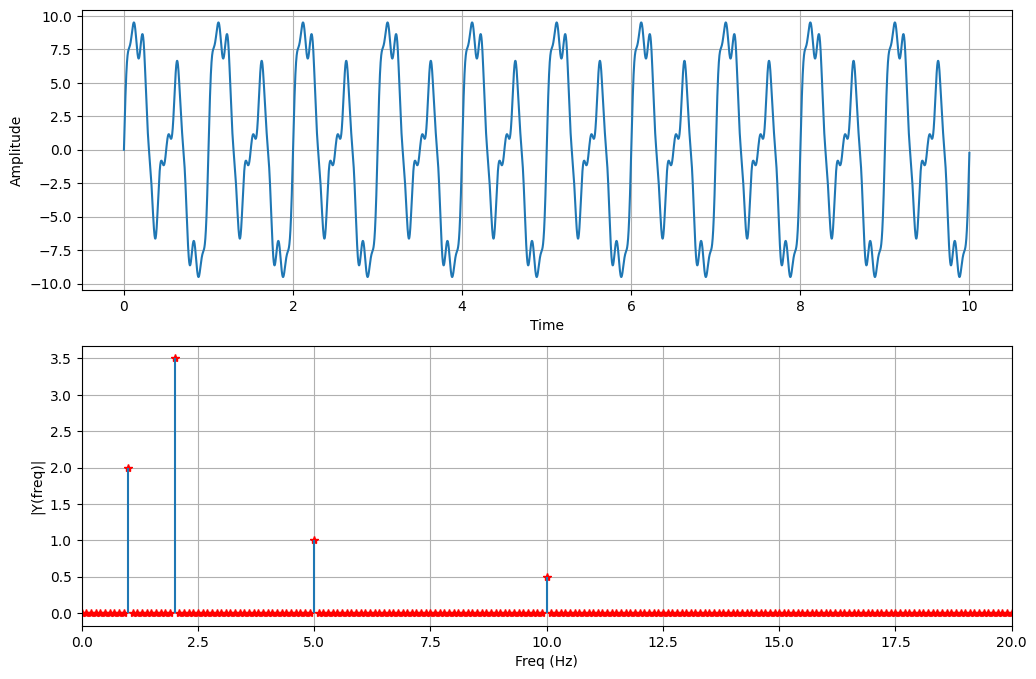

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(time, sin_sum)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude'); ax[0].grid(True)


ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='*') 
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(Y))
ax[1].set_xlim([0, 20]); ax[1].grid(True)
plt.show()

In [9]:
sin_concat = np.concatenate((sin1, sin2, sin3, sin_sum))


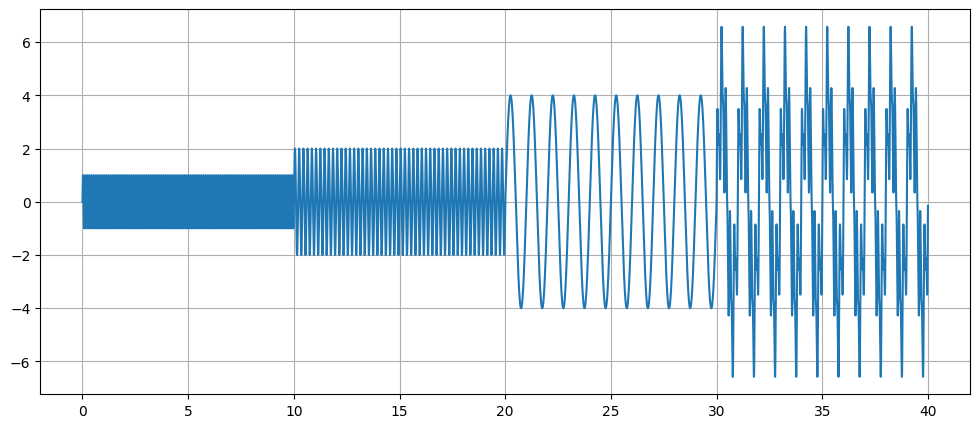

In [10]:
time = np.arange(0, 40, 0.001)

plt.figure(figsize=(12,5))
plt.plot(time, sin_concat)
plt.grid()
plt.show()

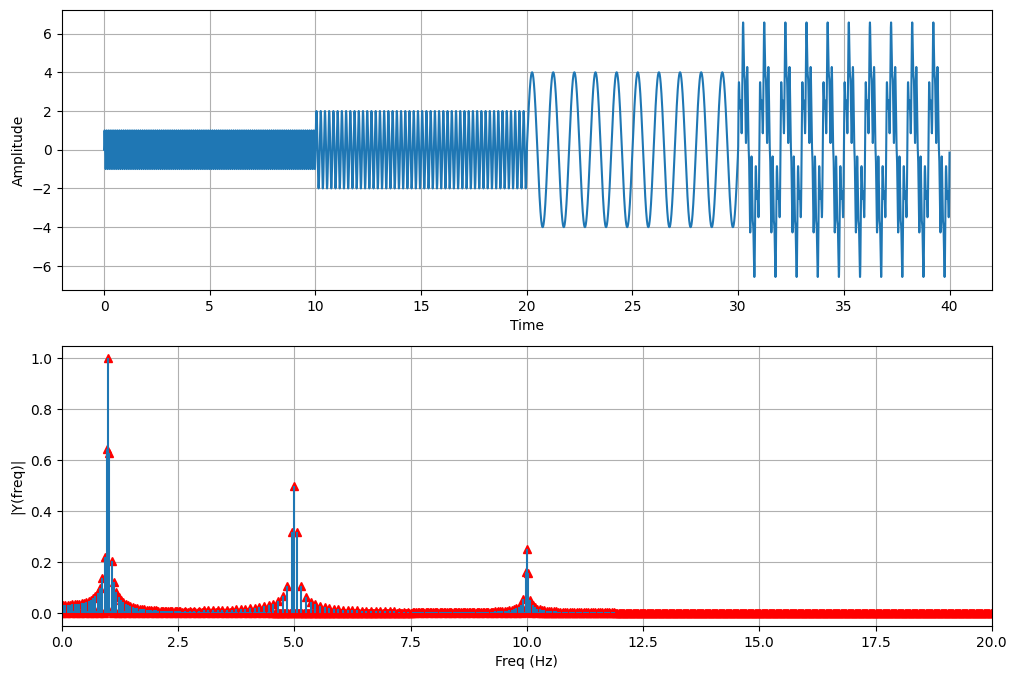

In [11]:
n = len(sin_concat) 
k = np.arange(n)
Fs = 1/0.001; T = n/Fs
freq = k/T 
freq = freq[range(int(n/2))] 
Y = np.fft.fft(sin_concat)/n 
Y = Y[range(int(n/2))]

fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(time, sin_concat)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].plot(freq, abs(Y), 'r', linestyle=' ', marker='^') 
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].set_xlim([0, 20])
ax[1].vlines(freq, [0], abs(Y)); ax[1].grid(True)
plt.show()

### FFT 계산
* FFT 결과는 대칭성을 가지고 있으므로 절반만 가져오는게 맞다

In [ ]:
nor_path = "../2. Validation/2.2kW/L-DEF-01/정상/"
Folder_path = os.listdir(nor_path)
csv_files = [file for file in Folder_path if file.endswith('.csv')]

using_csv = os.path.join(nor_path, csv_files[0])
df = pd.read_csv(using_csv, skiprows= 9, usecols= [0,1], names = ['time', 'acceleration'])
df.head()

df = pd.read_csv(using_csv, skiprows= 9, usecols= [0,1], names = ['time', 'acceleration'])

N = df.shape[0] # data size
Meta = pd.read_csv(using_csv, skiprows= 4, nrows= 1, header= None, usecols= [2])
Sample_rate = pd.read_csv(using_csv, skiprows= 6, nrows= 1, header= None, usecols= [1])
fs = Sample_rate[1] # 샘플링 주파수 -> ex) 1000 Hz : 초당 1000개의 샘플이 있다
Frequency = Meta[2]/60 # 주파수
dt = 1/fs[0] # 샘플링 간격

In [ ]:

yf_temp = np.fft.fft(df['acceleration']) # y축 값
yf = np.abs(yf_temp[:N // 2]) / (N/2) # 길이 조정 
xf = np.fft.fftfreq(N, d= dt)[:N // 2]
# xf = np.linspace(0.0, 1.0 / (2.0 * dt), N//2) # fft에서도 xf를 만들 수 있었다

In [ ]:

yf_temp = np.fft.fft(df['acceleration']) # y축 값
yf = np.abs(yf_temp[:N // 2]) / (N/2) # 길이 조정 
xf = np.fft.fftfreq(N, d= dt)[:N // 2]
# xf = np.linspace(0.0, 1.0 / (2.0 * dt), N//2) # fft에서도 xf를 만들 수 있었다

In [ ]:
# 예시용
plt.plot(yf_temp) # 가운데를 기준으로 대칭성을 띔
plt.vlines(x= range(6000,6050) ,ymin= -1 , ymax=1 , colors='red')
plt.show()

In [ ]:
# 주파수 영역에서의 FFT 결과 플로팅 
# 3sigma 위치를 알아두고 다음에 이 위로 나와있는 값들을 제거하여 정상 데이터를 만들어보자
plt.plot(xf, yf, linestyle = ' ', marker = '*')
plt.xlabel('Freq(Hz)')
plt.hlines(np.std(yf)*3, min(xf),max(xf), colors= 'red')
plt.xlabel('Freq(Hz)')
plt.grid()
plt.show()